<a href="https://colab.research.google.com/github/MrAgui/LE2_Aguilar_KJ/blob/main/LE2_Aguilar_KJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I.** **Understanding the problem**

Dataset info
*   Source: https://archive.ics.uci.edu/dataset/42/glass+identification
*   Problem: to classify different types of glass based on their chemical composition.

The Glass Identification dataset contains information about various types of glass, where the goal in this lab is to classify each sample into one of several glass types based on its chemical composition.

The dataset includes the following attributes:

RI: Refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type: The type of glass (target variable)


In [ ]:
import requests
import pandas as pd
import warnings
# Define the URL of the Glass Identification dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

# Download the dataset
response = requests.get(url)

# Save the downloaded data to a file
file_path = "./glass_data.csv"
with open(file_path, 'wb') as f:
    f.write(response.content)

# Define column names
column_names = [
    "Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"
]

# Load the dataset into a pandas DataFrame
glass_df = pd.read_csv(file_path, names=column_names)

# Display the first few rows of the DataFrame
print(glass_df.head(), "\n")
print(glass_df.info(), "\n")
print(glass_df.describe(), "\n")

warnings.filterwarnings("ignore", category=ImportWarning)

   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64 

# **II.** **Data Preparation**



In [ ]:
def data_quality_checks(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("[!] No missing values")
    else:
        print("Missing values:\n", missing_values)

    # Check for duplicates
    duplicates = df.duplicated().sum()
    if duplicates == 0:
        print("[!] No duplicates found")
    else:
        print("Number of duplicates:", duplicates)

    # Check summary statistics
    summary_stats = df.describe()

    return summary_stats

summary_stats = data_quality_checks(glass_df)

# Print summary statistics
print("Summary statistics:\n", summary_stats)

[!] No missing values
[!] No duplicates found
Summary statistics:
                Id          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  

# **III. Data Visualization**

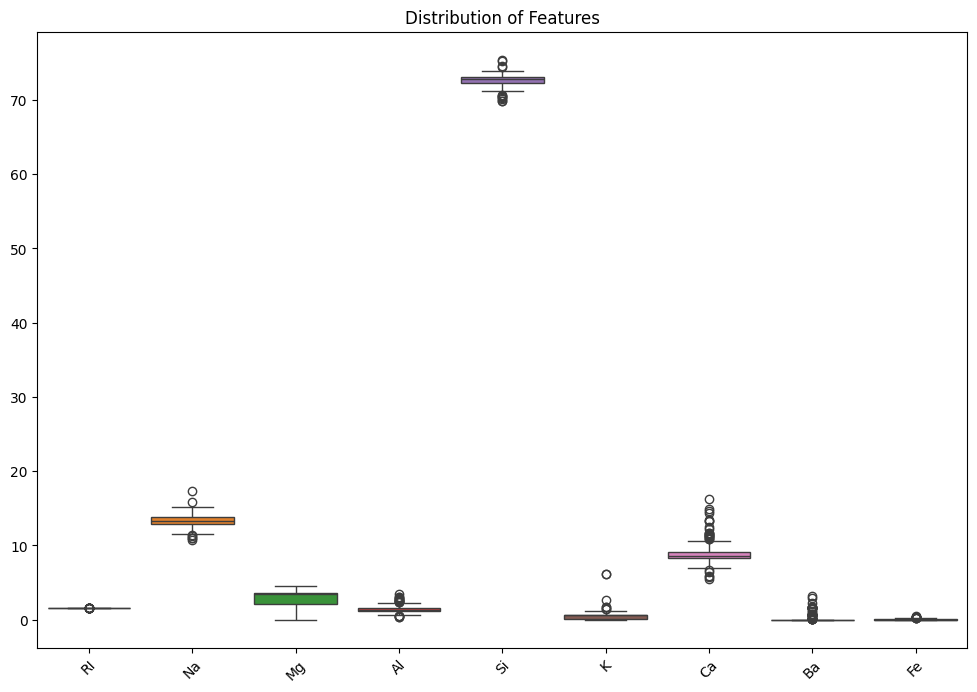

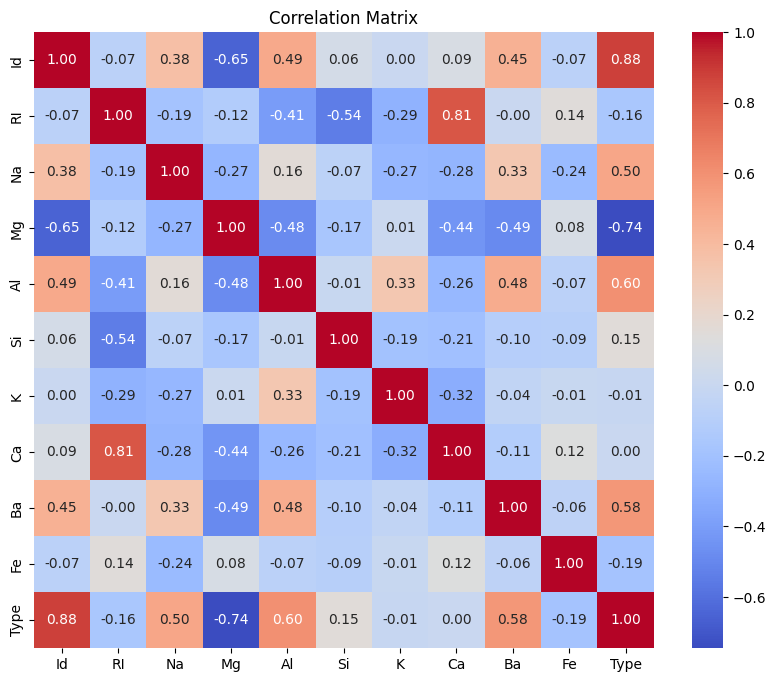

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of features
plt.figure(figsize=(12, 8))
sns.boxplot(data=glass_df.drop(columns=["Id", "Type"]))
plt.title("Distribution of Features")
plt.xticks(rotation=45)
plt.show()

# Check for correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(glass_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **IV. Model Selection**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define pipeline for Logistic Regression
# In general I used StandardScalar to standardize features by removing the mean and scaling to unit variance
logistic_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000, solver='liblinear'))  # Logistic Regression model
])

# Define pipeline for Random Forests
random_forest_pipeline = Pipeline([
    ("random_forest", RandomForestClassifier(random_state=42))  # Random Forest Classifier model
])

# Define pipeline for Support Vector Machines (SVM)
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", random_state=42))  # SVM Classifier model with radial basis function kernel
])

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = glass_df.drop(columns=["Id", "Type"])  # Features
y = glass_df["Type"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
logistic_pipeline.fit(X_train, y_train)
random_forest_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=42))])

# **V. Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Function to evaluate and display results for a given model
def evaluate_model(model, X_test, y_test):
    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Display evaluation metrics
    print("Accuracy: {:.2%}".format(accuracy))
    print("Precision: {:.2%}".format(precision))
    print("Recall: {:.2%}".format(recall))
    print("F1-score: {:.2%}".format(f1))

    # Generate confusion matrix
    # cm = confusion_matrix(y_test, y_pred)

    # # Visualize confusion matrix
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=range(1, 8), yticklabels=range(1, 8))
    # plt.title("Confusion Matrix")
    # plt.xlabel("Predicted")
    # plt.ylabel("Actual")
    # plt.show()

In [ ]:
# Evaluate Logistic Regression model
print("Evaluation results for Logistic Regression model:")
evaluate_model(logistic_pipeline, X_test, y_test)


Evaluation results for Logistic Regression model:
Accuracy: 60.47%
Precision: 54.85%
Recall: 60.47%
F1-score: 54.68%


In [ ]:
# Evaluate Random Forests model
print("\nEvaluation results for Random Forests model:")
evaluate_model(random_forest_pipeline, X_test, y_test)


Evaluation results for Random Forests model:
Accuracy: 83.72%
Precision: 86.68%
Recall: 83.72%
F1-score: 83.30%


In [ ]:
# Evaluate SVM model
print("\nEvaluation results for SVM model:")
evaluate_model(svm_pipeline, X_test, y_test)


Evaluation results for SVM model:
Accuracy: 72.09%
Precision: 67.59%
Recall: 72.09%
F1-score: 68.77%


# **VI. Model Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
logistic_params = {
    "logistic__C": [0.01, 0.1, 1, 10, 100]  # Regularization parameter values
}

logistic_grid_search = GridSearchCV(logistic_pipeline, param_grid=logistic_params, cv=5)
logistic_grid_search.fit(X_train, y_train)

# Hyperparameter tuning for Random Forests
random_forest_params = {
    "random_forest__n_estimators": [50, 100, 150],  # Number of trees
    "random_forest__max_depth": [None, 10, 20]  # Maximum depth of trees
}

random_forest_grid_search = GridSearchCV(random_forest_pipeline, param_grid=random_forest_params, cv=5)
random_forest_grid_search.fit(X_train, y_train)

# Hyperparameter tuning for SVM
svm_params = {
    "svm__C": [0.01, 0.1, 1, 10, 100],  # Regularization parameter values
    "svm__kernel": ["linear", "rbf", "poly"]  # Kernel types
}

svm_grid_search = GridSearchCV(svm_pipeline, param_grid=svm_params, cv=5)
svm_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for each model
print("Best hyperparameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best hyperparameters for Random Forests:", random_forest_grid_search.best_params_)
print("Best hyperparameters for SVM:", svm_grid_search.best_params_)

Best hyperparameters for Logistic Regression: {'logistic__C': 1}
Best hyperparameters for Random Forests: {'random_forest__max_depth': 10, 'random_forest__n_estimators': 150}
Best hyperparameters for SVM: {'svm__C': 100, 'svm__kernel': 'rbf'}


# **VII**. **Summary**

In [ ]:
def print_evaluation_results(model_name, accuracy, f1, precision, recall):
    print(f"{model_name:<20} | {accuracy:.2%} | {f1:.2%} | {precision:.2%} | {recall:.2%}")

# Print evaluation results before hyperparameter tuning
print("Before hyperparameter tuning:")
print("\nModel\t\t     | Accuracy\t| F1 score  |Precision\t|Recall")
print("-" * 70)
print_evaluation_results("SVM", accuracy_score(y_test, svm_pipeline.predict(X_test)),
                         f1_score(y_test, svm_pipeline.predict(X_test), average='weighted', zero_division=0),
                         precision_score(y_test, svm_pipeline.predict(X_test), average='weighted', zero_division=0),
                         recall_score(y_test, svm_pipeline.predict(X_test), average='weighted', zero_division=0))

print_evaluation_results("Random Forests", accuracy_score(y_test, random_forest_pipeline.predict(X_test)),
                         f1_score(y_test, random_forest_pipeline.predict(X_test), average='weighted',zero_division=0),
                         precision_score(y_test, random_forest_pipeline.predict(X_test), average='weighted',zero_division=0),
                         recall_score(y_test, random_forest_pipeline.predict(X_test), average='weighted',zero_division=0))

print_evaluation_results("Logistic Regression", accuracy_score(y_test, logistic_pipeline.predict(X_test)),
                         f1_score(y_test, logistic_pipeline.predict(X_test), average='weighted',zero_division=0),
                         precision_score(y_test, logistic_pipeline.predict(X_test), average='weighted',zero_division=0),
                         recall_score(y_test, logistic_pipeline.predict(X_test), average='weighted',zero_division=0))

# Print evaluation results after hyperparameter tuning
print("\nAfter hyperparameter tuning:")
print("\nModel\t\t     | Accuracy\t| F1 score  |Precision\t|Recall")
print("-" * 70)
print_evaluation_results("SVM", accuracy_score(y_test, svm_grid_search.best_estimator_.predict(X_test)),
                         f1_score(y_test, svm_grid_search.best_estimator_.predict(X_test), average='weighted', zero_division=0),
                         precision_score(y_test, svm_grid_search.best_estimator_.predict(X_test), average='weighted',zero_division=0),
                         recall_score(y_test, svm_grid_search.best_estimator_.predict(X_test), average='weighted',zero_division=0))

print_evaluation_results("Random Forests", accuracy_score(y_test, random_forest_grid_search.best_estimator_.predict(X_test)),
                         f1_score(y_test, random_forest_grid_search.best_estimator_.predict(X_test), average='weighted',zero_division=0),
                         precision_score(y_test, random_forest_grid_search.best_estimator_.predict(X_test), average='weighted',zero_division=0),
                         recall_score(y_test, random_forest_grid_search.best_estimator_.predict(X_test), average='weighted',zero_division=0))

print_evaluation_results("Logistic Regression", accuracy_score(y_test, logistic_grid_search.best_estimator_.predict(X_test)),
                         f1_score(y_test, logistic_grid_search.best_estimator_.predict(X_test), average='weighted',zero_division=0),
                         precision_score(y_test, logistic_grid_search.best_estimator_.predict(X_test), average='weighted',zero_division=0),
                         recall_score(y_test, logistic_grid_search.best_estimator_.predict(X_test), average='weighted',zero_division=0))

Before hyperparameter tuning:

Model		     | Accuracy	| F1 score  |Precision	|Recall
----------------------------------------------------------------------
SVM                  | 72.09% | 68.77% | 67.59% | 72.09%
Random Forests       | 83.72% | 83.30% | 86.68% | 83.72%
Logistic Regression  | 60.47% | 54.68% | 54.85% | 60.47%

After hyperparameter tuning:

Model		     | Accuracy	| F1 score  |Precision	|Recall
----------------------------------------------------------------------
SVM                  | 74.42% | 74.42% | 75.31% | 74.42%
Random Forests       | 86.05% | 85.54% | 88.17% | 86.05%
Logistic Regression  | 60.47% | 54.68% | 54.85% | 60.47%


In [ ]:
# Function to collect evaluation metrics
def collect_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

# Collecting metrics for models before hyperparameter tuning
svm_metrics_before = collect_metrics(svm_pipeline, X_test, y_test)
rf_metrics_before = collect_metrics(random_forest_pipeline, X_test, y_test)
logistic_metrics_before = collect_metrics(logistic_pipeline, X_test, y_test)

# Collecting metrics for models after hyperparameter tuning
svm_metrics_after = collect_metrics(svm_grid_search.best_estimator_, X_test, y_test)
rf_metrics_after = collect_metrics(random_forest_grid_search.best_estimator_, X_test, y_test)
logistic_metrics_after = collect_metrics(logistic_grid_search.best_estimator_, X_test, y_test)

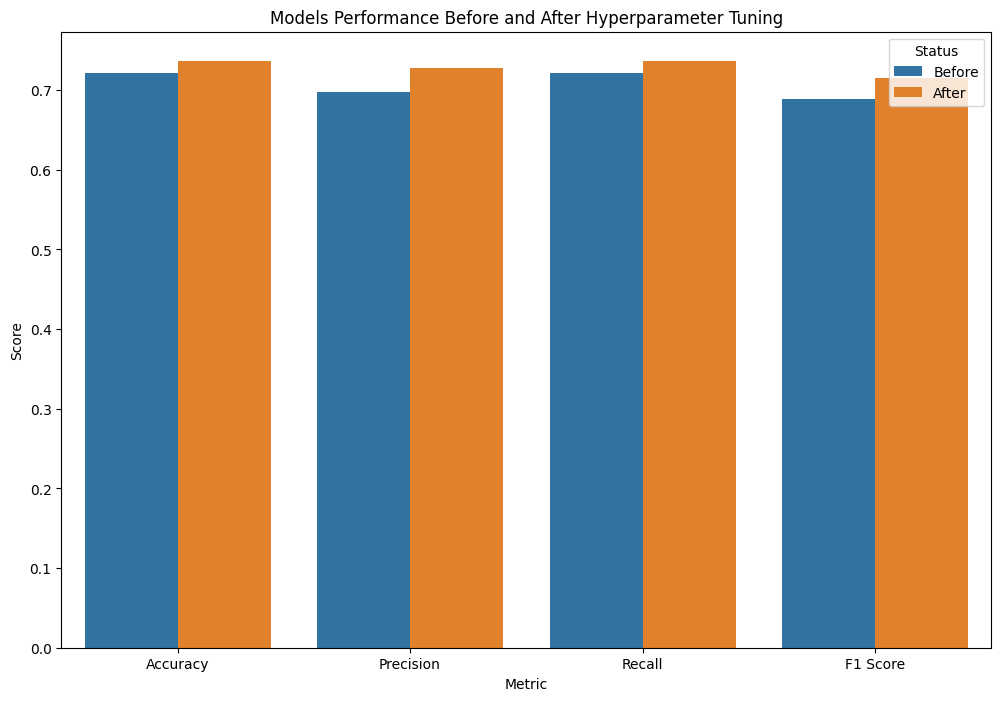

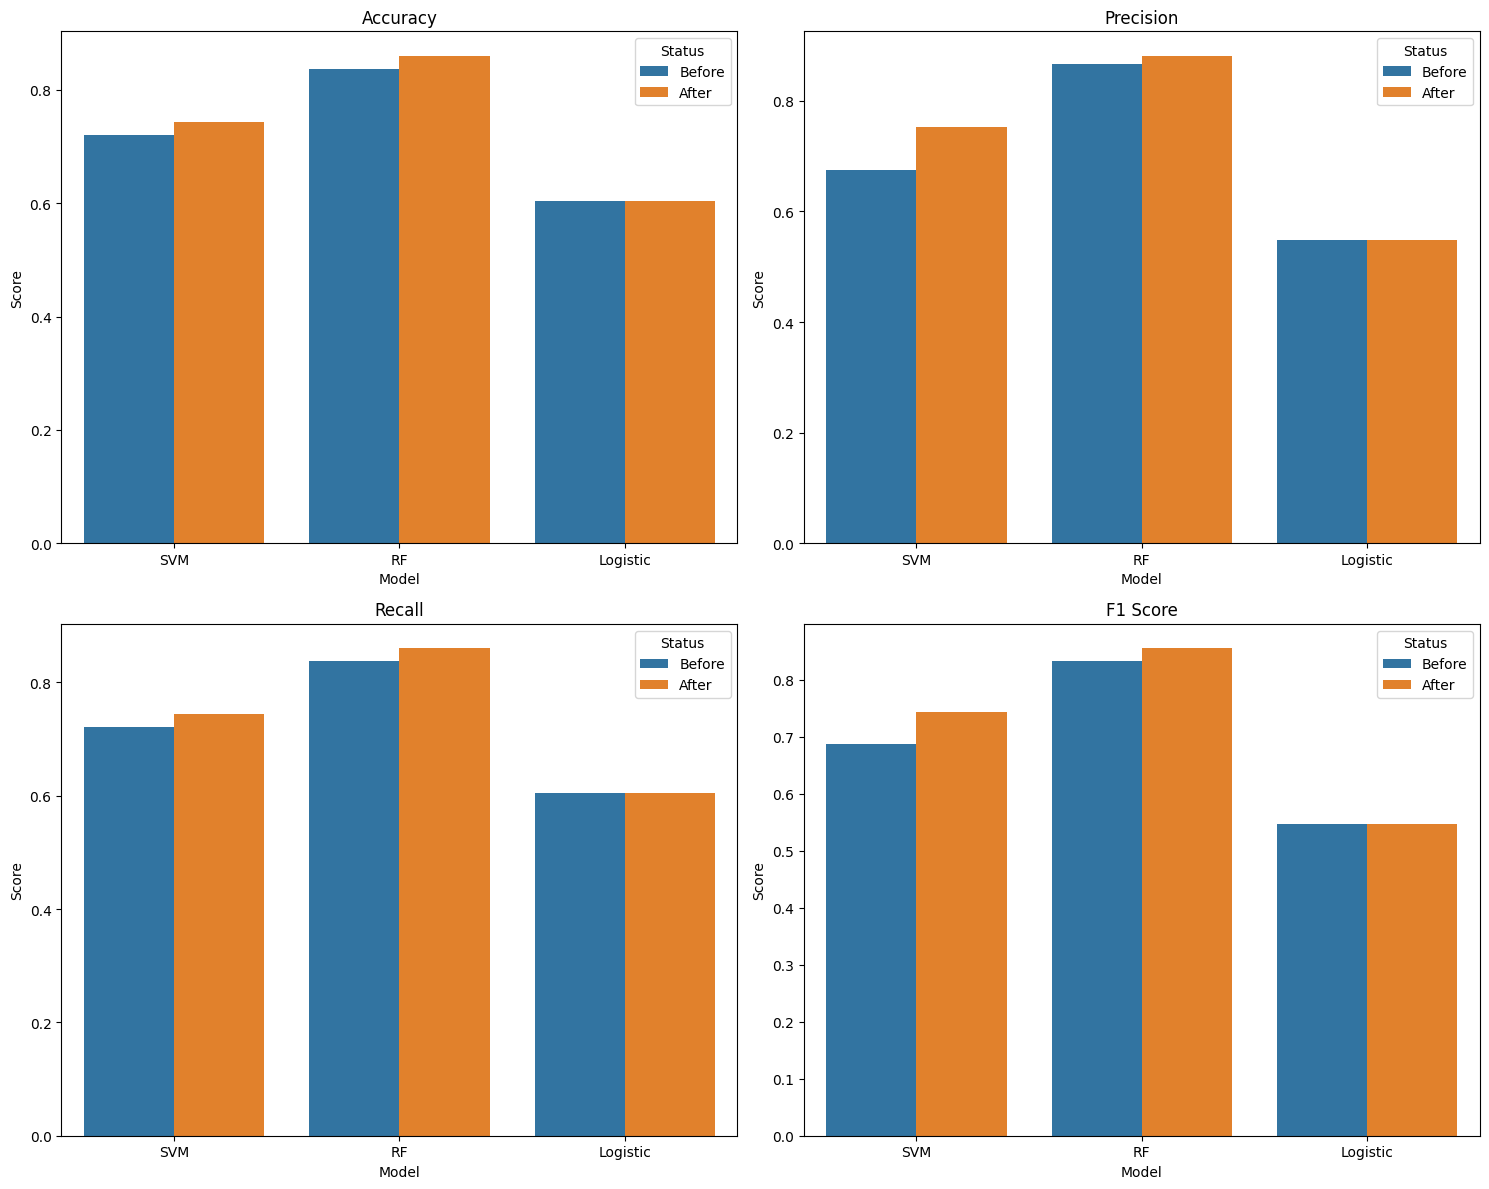

In [ ]:
metrics_df = pd.DataFrame({
    'Model': ['SVM', 'SVM', 'RF', 'RF', 'Logistic', 'Logistic'],
    'Status': ['Before', 'After', 'Before', 'After', 'Before', 'After'],
    'Accuracy': [svm_metrics_before[0], svm_metrics_after[0], rf_metrics_before[0], rf_metrics_after[0], logistic_metrics_before[0], logistic_metrics_after[0]],
    'Precision': [svm_metrics_before[1], svm_metrics_after[1], rf_metrics_before[1], rf_metrics_after[1], logistic_metrics_before[1], logistic_metrics_after[1]],
    'Recall': [svm_metrics_before[2], svm_metrics_after[2], rf_metrics_before[2], rf_metrics_after[2], logistic_metrics_before[2], logistic_metrics_after[2]],
    'F1 Score': [svm_metrics_before[3], svm_metrics_after[3], rf_metrics_before[3], rf_metrics_after[3], logistic_metrics_before[3], logistic_metrics_after[3]]
})

# Melting the DataFrame for easier plotting
metrics_melted = metrics_df.melt(id_vars=['Model', 'Status'], var_name='Metric', value_name='Value')

# Plotting the metrics
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Value', hue='Status', data=metrics_melted, errorbar=None)
plt.title('Models Performance Before and After Hyperparameter Tuning')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Status')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics_list):
    sns.barplot(ax=axes[i//2, i%2], x='Model', y='Value', hue='Status', data=metrics_melted[metrics_melted['Metric'] == metric], errorbar=None)
    axes[i//2, i%2].set_title(metric)
    axes[i//2, i%2].set_ylabel('Score')
    axes[i//2, i%2].set_xlabel('Model')

plt.tight_layout()
plt.show()